# Week 2: Language Model and Bayes Classifier

## Language Model

A language model is a type of artificial intelligence designed to understand and generate human language. It predicts the probability of a sequence of words, which can be used for various tasks such as text generation, translation, sentiment analysis, and more. In essence, a language model can read and write, making it a powerful tool for understanding and generating text.

Contents of this section:
*   Practice: Tokenization
*   Practice: Language Model



### Setting Environment
Install python packages

In [ ]:
!pip install nltk
!pip install tokenizers

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('book')

[nltk_data] Downloading package stopwords to /home/devrok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/devrok/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/devrok/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/devrok/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/devrok/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/devrok/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/devrok/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading 

True

## Practice: Tokenization

Tokenization is a fundamental step in natural language processing (NLP) that involves breaking down text into smaller units called tokens. These tokens can be words, subwords, or even characters, depending on the specific task and the method used. The process of tokenization helps in structuring the text in a way that it can be easily analyzed and processed by NLP models.

### Rule-based Tokenizer
The Natural Language Toolkit (NLTK) is a powerful Python library designed for working with human language data, often referred to as Natural Language Processing (NLP). NLTK provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

In [2]:
#띄어쓰기 단위로 tokenizer
from nltk.tokenize import word_tokenize

text = 'To be, or not to be, that is the question.' # TODO: Observe how the result changes by inputting different strings.
tokens = word_tokenize(text)
print(tokens)

['To', 'be', ',', 'or', 'not', 'to', 'be', ',', 'that', 'is', 'the', 'question', '.']


### Subword Tokenizer
Byte Pair Encoding (BPE) is a data compression technique that iteratively merges the most frequent pairs of bytes (or characters) in a text corpus. This merging process continues until a specified vocabulary size is reached. The primary advantage of BPE is its ability to break down rare or unseen words into smaller, more frequent subword units, thereby reducing the incidence of out-of-vocabulary (OOV) words and enabling better handling of morphologically rich languages.

In [3]:
from collections import Counter, defaultdict

def get_stats(vocab):
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split() # TODO: Separate a word into symbols based on spaces
        for i in range(len(symbols)-1):
            pairs[symbols[i], symbols[i+1]] += freq
    return pairs

In [4]:
vocab = {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}
num_merges = 12
pairs = get_stats(vocab)
pairs

defaultdict(int,
            {('l', 'o'): 7,
             ('o', 'w'): 7,
             ('w', '</w>'): 5,
             ('w', 'e'): 8,
             ('e', 'r'): 2,
             ('r', '</w>'): 2,
             ('n', 'e'): 6,
             ('e', 'w'): 6,
             ('e', 's'): 9,
             ('s', 't'): 9,
             ('t', '</w>'): 9,
             ('w', 'i'): 3,
             ('i', 'd'): 3,
             ('d', 'e'): 3})

In [5]:
best = max(pairs, key=pairs.get)
best

('e', 's')

In [6]:
def merge_vocab(pair, v_in):
    '''
    Examples:
        pair: ['l', 'o']
        v_in: {'l o w </w>': 5, 'l o w e r </w>': 2}
        -------------------------
        v_out: {'lo w </w>': 5, 'lo w e r </w>': 2}
    '''
    v_out = {}
    bigram = ' '.join(pair) # TODO: fill here
    replacement = ''.join(pair) # TODO: fill here
    for word in v_in:
        w_out = word.replace(bigram, replacement) # TODO: fill here
        v_out[w_out] = v_in[word]
    return v_out

vocab = {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}
num_merges = 12
for i in range(num_merges):
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get)
    print('pre Vocab:', vocab)
    vocab = merge_vocab(best, vocab)
    print('Merge:', best)
    print('after Vocab:', vocab)


pre Vocab: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}
Merge: ('e', 's')
after Vocab: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}
pre Vocab: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}
Merge: ('es', 't')
after Vocab: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}
pre Vocab: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}
Merge: ('est', '</w>')
after Vocab: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}
pre Vocab: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}
Merge: ('l', 'o')
after Vocab: {'lo w </w>': 5, 'lo w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}
pre Vocab: {'lo w </w>': 5, 'lo w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}
Merge: ('lo', 'w')
after Vocab: {'low </w>': 5, 'low e r </w>': 2, 'n e w est</w>': 6, 'w 

### NLTK vs. BPE

In [7]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from tokenizers import Tokenizer, models, trainers, pre_tokenizers, decoders, processors

import re
from collections import Counter, defaultdict

class BPETokenizer:
    def __init__(self, vocab_size):
        self.vocab_size = vocab_size
        self.vocab = {}

    def get_stats(self, tokens):
        pairs = defaultdict(int)
        for token in tokens:
            symbols = token.split()
            for i in range(len(symbols)-1):
                pairs[(symbols[i], symbols[i+1])] += 1
        return pairs

    def merge_vocab(self, pair, tokens):
        new_tokens = []
        bigram = ' '.join(pair)
        replacement = ''.join(pair)
        for token in tokens:
            new_token = token.replace(bigram, replacement)
            new_tokens.append(new_token)
        return new_tokens

    def fit(self, text):
        words = re.findall(r'\w+', text)
        tokens = [' '.join(list(word)) for word in words]
        vocab = Counter(tokens)

        while len(self.vocab) < self.vocab_size:
            pairs = self.get_stats(vocab)
            if not pairs:
                break
            best = max(pairs, key=pairs.get)
            vocab = self.merge_vocab(best, vocab)
            self.vocab[''.join(best)] = pairs[best]

        self.vocab = dict(sorted(self.vocab.items(), key=lambda item: item[1], reverse=True))

    def tokenize(self, word):
        word = ' '.join(list(word))
        while True:
            pairs = self.get_stats([word])
            if not pairs:
                break
            best = max(pairs, key=pairs.get)
            bigram = ' '.join(best)
            if bigram not in word:
                break
            word = word.replace(bigram, ''.join(best))
        return word.split()

text = '''
To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles
And by opposing end them. To die: to sleep;
No more; and by a sleep to say we end
The heart-ache and the thousand natural shocks
That flesh is heir to, 'tis a consummation
Devoutly to be wish'd. To die, to sleep;
To sleep: perchance to dream: ay, there's the rub;
For in that sleep of death what dreams may come
When we have shuffled off this mortal coil,
Must give us pause: there's the respect
That makes calamity of so long life;
For who would bear the whips and scorns of time,
The oppressor's wrong, the proud man's contumely,
The pangs of despised love, the law's delay,
The insolence of office and the spurns
That patient merit of the unworthy takes,
When he himself might his quietus make
With a bare bodkin? who would fardels bear,
To grunt and sweat under a weary life,
But that the dread of something after death,
The undiscovered country from whose bourn
No traveller returns, puzzles the will
And makes us rather bear those ills we have
Than fly to others that we know not of?
Thus conscience does make cowards of us all;
And thus the native hue of resolution
Is sicklied o'er with the pale cast of thought,
And enterprises of great pitch and moment
With this regard their currents turn awry,
And lose the name of action.--Soft you now!
The fair Ophelia! Nymph, in thy orisons
Be all my sins remember'd.
'''
text = ' '.join(text.split())

words = word_tokenize(text)
print('NLTK Tokenization:', words)

tokenizer = BPETokenizer(vocab_size=50)
tokenizer.fit(text)
words = []
for word in re.findall(r'\w+', text):
    words.extend(tokenizer.tokenize(word))
print('BPE Tokenization:', words)

NLTK Tokenization: ['To', 'be', ',', 'or', 'not', 'to', 'be', ',', 'that', 'is', 'the', 'question', ':', 'Whether', "'t", 'is', 'nobler', 'in', 'the', 'mind', 'to', 'suffer', 'The', 'slings', 'and', 'arrows', 'of', 'outrageous', 'fortune', ',', 'Or', 'to', 'take', 'arms', 'against', 'a', 'sea', 'of', 'troubles', 'And', 'by', 'opposing', 'end', 'them', '.', 'To', 'die', ':', 'to', 'sleep', ';', 'No', 'more', ';', 'and', 'by', 'a', 'sleep', 'to', 'say', 'we', 'end', 'The', 'heart-ache', 'and', 'the', 'thousand', 'natural', 'shocks', 'That', 'flesh', 'is', 'heir', 'to', ',', "'t", 'is', 'a', 'consummation', 'Devoutly', 'to', 'be', 'wish', "'d", '.', 'To', 'die', ',', 'to', 'sleep', ';', 'To', 'sleep', ':', 'perchance', 'to', 'dream', ':', 'ay', ',', 'there', "'s", 'the', 'rub', ';', 'For', 'in', 'that', 'sleep', 'of', 'death', 'what', 'dreams', 'may', 'come', 'When', 'we', 'have', 'shuffled', 'off', 'this', 'mortal', 'coil', ',', 'Must', 'give', 'us', 'pause', ':', 'there', "'s", 'the', '

## Practice: Langauge Model
In this tutorial, we will explore language models, how they compute the probability of words, and the application of the chain rule in probability. We will also discuss the practical considerations of using uni-gram and n-gram models, including the trade-offs between them. To make things more concrete, we will use examples from Shakespeare's works.

In [8]:
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
from nltk.tokenize import RegexpTokenizer
import math
import random

tokenizer = RegexpTokenizer('[\w]+')
text = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt').lower()
words = tokenizer.tokenize(text)
print(words[:100])

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare', '1599', 'actus', 'primus', 'scoena', 'prima', 'enter', 'barnardo', 'and', 'francisco', 'two', 'centinels', 'barnardo', 'who', 's', 'there', 'fran', 'nay', 'answer', 'me', 'stand', 'vnfold', 'your', 'selfe', 'bar', 'long', 'liue', 'the', 'king', 'fran', 'barnardo', 'bar', 'he', 'fran', 'you', 'come', 'most', 'carefully', 'vpon', 'your', 'houre', 'bar', 'tis', 'now', 'strook', 'twelue', 'get', 'thee', 'to', 'bed', 'francisco', 'fran', 'for', 'this', 'releefe', 'much', 'thankes', 'tis', 'bitter', 'cold', 'and', 'i', 'am', 'sicke', 'at', 'heart', 'barn', 'haue', 'you', 'had', 'quiet', 'guard', 'fran', 'not', 'a', 'mouse', 'stirring', 'barn', 'well', 'goodnight', 'if', 'you', 'do', 'meet', 'horatio', 'and', 'marcellus', 'the', 'riuals', 'of', 'my', 'watch', 'bid', 'them']


In [9]:
text

"[the tragedie of hamlet by william shakespeare 1599]\n\n\nactus primus. scoena prima.\n\nenter barnardo and francisco two centinels.\n\n  barnardo. who's there?\n  fran. nay answer me: stand & vnfold\nyour selfe\n\n   bar. long liue the king\n\n   fran. barnardo?\n  bar. he\n\n   fran. you come most carefully vpon your houre\n\n   bar. 'tis now strook twelue, get thee to bed francisco\n\n   fran. for this releefe much thankes: 'tis bitter cold,\nand i am sicke at heart\n\n   barn. haue you had quiet guard?\n  fran. not a mouse stirring\n\n   barn. well, goodnight. if you do meet horatio and\nmarcellus, the riuals of my watch, bid them make hast.\nenter horatio and marcellus.\n\n  fran. i thinke i heare them. stand: who's there?\n  hor. friends to this ground\n\n   mar. and leige-men to the dane\n\n   fran. giue you good night\n\n   mar. o farwel honest soldier, who hath relieu'd you?\n  fra. barnardo ha's my place: giue you goodnight.\n\nexit fran.\n\n  mar. holla barnardo\n\n   bar. 

In [10]:
text[:100]

'[the tragedie of hamlet by william shakespeare 1599]\n\n\nactus primus. scoena prima.\n\nenter barnardo a'

In [11]:
words[:30]

['the',
 'tragedie',
 'of',
 'hamlet',
 'by',
 'william',
 'shakespeare',
 '1599',
 'actus',
 'primus',
 'scoena',
 'prima',
 'enter',
 'barnardo',
 'and',
 'francisco',
 'two',
 'centinels',
 'barnardo',
 'who',
 's',
 'there',
 'fran',
 'nay',
 'answer',
 'me',
 'stand',
 'vnfold',
 'your',
 'selfe']

### Markov Assumption and Chain Rule

The chain rule of probability states that:

\[ P(A, B, C) = P(A) P(B|A) P(C|A, B) \]

By the Markov assumption, we approximate this to:

- Unigram: \( P(A, B, C) \approx P(A) P(B) P(C) \)
- Bigram: \( P(A, B, C) \approx P(A) P(B|A) P(C|B) \)


### Unigram Model

In a unigram model, we assume that the probability of each word is independent of the previous words. Therefore, the probability of a sequence of words \( w_1, w_2, \ldots, w_n \) is simply the product of the probabilities of each word:

\[ P(w_1, w_2, \ldots, w_n) = P(w_1) P(w_2) \ldots P(w_n) \]



In [12]:
unigram_pairs = words
unigram_counts = Counter(unigram_pairs)

unigram_counts

Counter({'the': 993,
         'and': 863,
         'to': 685,
         'of': 610,
         'i': 574,
         'you': 527,
         'a': 511,
         'my': 502,
         'it': 419,
         'in': 400,
         'that': 377,
         'ham': 337,
         'is': 328,
         'not': 300,
         'his': 285,
         'this': 276,
         'with': 254,
         'your': 253,
         'but': 249,
         'for': 245,
         'me': 228,
         'd': 223,
         'what': 211,
         'lord': 211,
         'as': 205,
         'he': 202,
         'be': 192,
         'so': 189,
         'haue': 178,
         'him': 178,
         'king': 172,
         'will': 149,
         'no': 137,
         'on': 131,
         'our': 130,
         'we': 128,
         's': 124,
         'are': 123,
         'if': 114,
         'all': 109,
         'then': 108,
         'by': 107,
         'thou': 107,
         'shall': 107,
         'come': 104,
         'do': 104,
         'let': 104,
         'or': 103,
    

In [13]:
test = {"a" : 10, "b" : 13}
sum(test.values())

23

In [14]:
unigram_pairs = words
unigram_counts = Counter(unigram_pairs)
unigram_total = sum(unigram_counts.values()) # TODO: Total counts of unigram pairs

unigram_probs = {pair: unigram_counts[pair] / unigram_total for pair in unigram_counts} # TODO: fill here
sorted_unigram_probs = dict(sorted(unigram_probs.items(), key=lambda item: item[1], reverse=True))
df = pd.DataFrame.from_dict(data=sorted_unigram_probs, orient='index')
df

0
the        0.032804
and        0.028509
to         0.022629
of         0.020151
i          0.018962
...             ...
souldiers  0.000033
marching   0.000033
peale      0.000033
ordenance  0.000033
finis      0.000033

[4701 rows x 1 columns]

In [15]:
type(unigram_probs)

dict

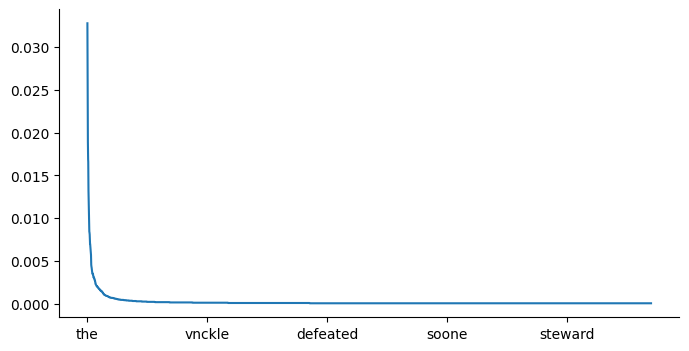

In [16]:
df[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
def unigram_model(start_word, max_token=100):
    result = [start_word]
    for _ in range(max_token):
        best_pair = max(unigram_probs, key=unigram_probs.get)# TODO: Select the pair with the highest probability
        result.append(best_pair)
    return result
generated_text = unigram_model('the')
print(' '.join(generated_text))

the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the


### Bigram Model

In a bigram model, we assume that the probability of each word depends only on the previous word. Therefore, the probability of a sequence of words \( w_1, w_2, \ldots, w_n \) is given by:

\[ P(w_1, w_2, \ldots, w_n) = P(w_1) P(w_2 | w_1) P(w_3 | w_2) \ldots P(w_n | w_{n-1}) \]


In [18]:
bigram_pairs = []

for i in range(1, len(words)):
    bigram_pairs.append((words[i-1], words[i]))
 # TODO: Make bigram pairs (e.g. a b c d -> [(a, b), (b, c), (c, d)])

bigram_counts = Counter(bigram_pairs)
bigram_total = sum(bigram_counts.values())
bigram_probs = {pair: bigram_counts[pair] / bigram_total for pair in bigram_counts}
sorted_bigram_probs = dict(sorted(bigram_probs.items(), key=lambda item: item[1], reverse=True))
df = pd.DataFrame.from_dict(data=sorted_bigram_probs, orient='index')
df

0
(my, lord)        0.005781
(in, the)         0.002412
(lord, ham)       0.002213
(to, the)         0.001982
(of, the)         0.001949
...                    ...
(shot, off)       0.000033
(off, finis)      0.000033
(finis, the)      0.000033
(hamlet, prince)  0.000033
(prince, of)      0.000033

[21131 rows x 1 columns]

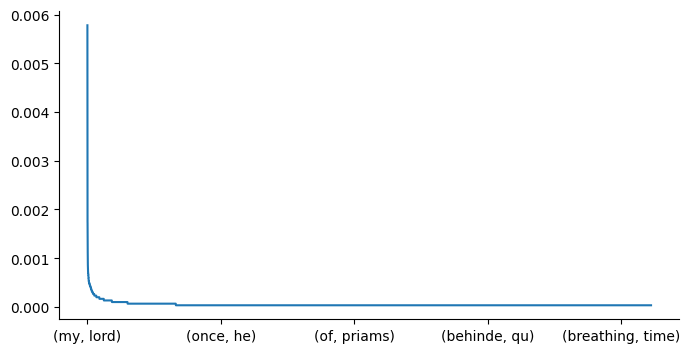

In [19]:
df[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
def bigram_model(start_word, max_token=100):
    result = [start_word]
    for _ in range(max_token):
        bigram_subset_probs = {pair : bigram_probs[pair] for pair in bigram_probs if pair[0] == result[-1]} # TODO: Select a subset of bigram_probs where the first element of the pair matches the last word of the result
        best_pair = max(bigram_subset_probs, key=bigram_subset_probs.get)
        result.append(best_pair[1])
    return result
generated_text = bigram_model('the')
print(' '.join(generated_text))

the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king


In [21]:
generated_text = bigram_model('lord')
print(' '.join(generated_text))

lord ham i haue you are not to the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and the king and


### General N-gram Model

An n-gram model generalizes this idea by assuming that the probability of each word depends on the previous $ ( n-1 ) $ words. The probability of a sequence of words $ ( w_1, w_2, \ldots, w_n ) $ in an n-gram model is given by:

$ P(w_1, w_2, \ldots, w_n) = P(w_1) P(w_2 | w_1) P(w_3 | w_1, w_2) \ldots P(w_n | w_{n-(n-1)}, \ldots, w_{n-1})$

In [22]:
n = 10
ngram_pairs = []
for i in range(1, len(words)):
    ngram_pairs.append((' '.join(words[max(0, i-n+1):i]), words[i]))
ngram_counts = Counter(ngram_pairs)
ngram_total = sum(ngram_counts.values())
ngram_probs = {pair: ngram_counts[pair] / ngram_total for pair in ngram_counts}
sorted_ngram_probs = dict(sorted(ngram_probs.items(), key=lambda item: item[1], reverse=True))
df = pd.DataFrame.from_dict(data=sorted_ngram_probs, orient='index')
df

0
(o a pit of clay for to be made, for)               0.000066
(a pit of clay for to be made for, such)            0.000066
(pit of clay for to be made for such, a)            0.000066
(of clay for to be made for such a, guest)          0.000066
(clay for to be made for such a guest, is)          0.000066
...                                                      ...
(peale of ordenance are shot off finis the trag...  0.000033
(of ordenance are shot off finis the tragedie o...  0.000033
(ordenance are shot off finis the tragedie of h...  0.000033
(are shot off finis the tragedie of hamlet prin...  0.000033
(shot off finis the tragedie of hamlet prince o...  0.000033

[30263 rows x 1 columns]

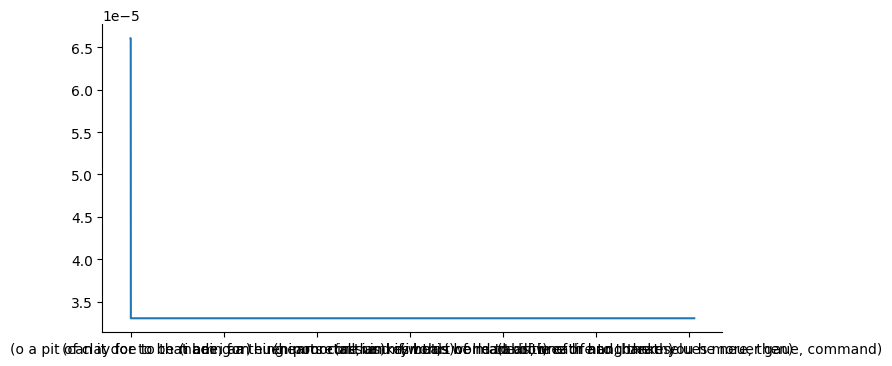

In [23]:
df[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

In [31]:
def ngram_model(start_word, max_token=100, n=10):
    result = [start_word]
    for _ in range(max_token):
        context = ' '.join(result[-(n-1):]) # Concat the last (n-1) words in the results (with spaces)
        ngram_subset_probs = {pair : ngram_probs[pair] for pair in ngram_probs if pair[0] == context}
        best_pair = max(ngram_subset_probs, key=ngram_subset_probs.get)
        result.append(best_pair[-1])
    return result
generated_text = ngram_model('the')
print(' '.join(generated_text))

the tragedie of hamlet by william shakespeare 1599 actus primus scoena prima enter barnardo and francisco two centinels barnardo who s there fran nay answer me stand vnfold your selfe bar long liue the king fran barnardo bar he fran you come most carefully vpon your houre bar tis now strook twelue get thee to bed francisco fran for this releefe much thankes tis bitter cold and i am sicke at heart barn haue you had quiet guard fran not a mouse stirring barn well goodnight if you do meet horatio and marcellus the riuals of my watch bid them make


### Trade-offs of Unigram vs. N-gram Models

- **Unigram Model**: Simple and computationally efficient, but ignores context, leading to less accurate predictions.
- **Bigram Model**: Considers the immediate context (previous word), providing better predictions than unigram but still limited in capturing longer dependencies.
- **N-gram Model**: Captures longer contexts, improving prediction accuracy at the cost of increased computational complexity and data sparsity.


## N-gram for email classification

In [32]:
# download spam/ham dataset
import gdown
from pathlib import Path

url = 'https://drive.google.com/uc?id=1Ua1q2hOfN25B6H8PDWXl4yViE_cNj3mp'
dataset_path = Path('./spam_dataset.tsv')
gdown.download(url, str(dataset_path), quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Ua1q2hOfN25B6H8PDWXl4yViE_cNj3mp
To: /home/devrok/aiexpert/ai-nlp/04_NLP_Theory/spam_dataset.tsv
100%|██████████| 5.50M/5.50M [00:00<00:00, 16.8MB/s]


'spam_dataset.tsv'

문장 spam
-> 테스트용 문장 (next token)

In [33]:
import pandas as pd
df = pd.read_csv(dataset_path, sep="\t")
df

Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3             1  
4             0  
...         ...  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1  

[5171 rows x 4 columns]

In [34]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df["text"],df["label_num"], test_size=0.2, random_state=10)

In [35]:
train_X[0], train_y

("Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",
 4164    0
 113     0
 2697    0
 737     0
 4214    1
        ..
 1180    0
 3441    1
 1344    1
 4623    0
 1289    0
 Name: label_num, Length: 4136, dtype: int64)

In [36]:
# concat all train_X to make .txt
# TODO: {text} {spam/ham} \n
email_text_train = ""
for x, l in zip(train_X, train_y):
  label_str = "spam" if l == 1 else "ham"
  email_text_train += f"{x} {label_str}\n"

In [37]:
email_text_train

'Subject: enron / hpl actuals for sept . 11 , 2000\r\nteco tap 25 . 000 / enron ; 125 . 000 / hpl gas daily\r\nls hpl lsk ic 15 . 000 / enron ham\nSubject: mitchell gas services 2 / 00\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by julie meyers / hou / ect on 03 / 20 / 2000 02 : 26\r\npm - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nenron north america corp .\r\nfrom : megan parker @ enron 03 / 20 / 2000 02 : 08 pm\r\nto : julie meyers / hou / ect @ ect\r\ncc : william c falbaum / hou / ect @ ect\r\nsubject : mitchell gas services 2 / 00\r\nwe have a price difference with mitchell gas services for 2 / 00 production ,\r\ndeal 156658 . we have hsc - 0 . 05 and mitchell shows hsc - 0 . 04 . can you tell\r\nme what the correct price is ? i need this asap .\r\nmegan ham\nSubject: jan . 01 sale to texas general land office\r\ndeal # 547201\r\ntexas general land office has called and is disputing that this sale is a\r\npart of the month exchange deal for transport .\r\

In [38]:
email_words_train = tokenizer.tokenize(email_text_train)

In [39]:
email_text_train[:10]

'Subject: e'

In [40]:
email_words_train[:3]

['Subject', 'enron', 'hpl']

In [41]:
# logic
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words("english"))

from string import punctuation

PUNCTUATIONS = set(punctuation)

def regularize_tokens(tokens):
    tokens = [t.strip() for t in tokens]
    tokens = [t.strip("".join(PUNCTUATIONS)) for t in tokens]
    tokens = [t for t in tokens if len(t) > 1]
    tokens = [t for t in tokens if t not in STOPWORDS]
    tokens = [t for t in tokens if t not in PUNCTUATIONS]
    tokens = [t for t in tokens if not re.match(r"^\d+?\.\d+?$", t)]  # e.g., 1.23
    tokens = [t for t in tokens if not re.match(r"^\d+?\,\d+?$", t)]  # e.g., 1,234
    tokens = [t for t in tokens if not t.isnumeric()]  # e.g., 123
    return tokens

In [42]:
email_words_train = regularize_tokens(email_words_train)

In [43]:
# make ngram model
n = 10
ngram_pairs = []
for i in range(1, len(email_words_train)):
    ngram_pairs.append((' '.join(email_words_train[max(0, i-n+1):i]), email_words_train[i]))
ngram_counts = Counter(ngram_pairs)
ngram_total = sum(ngram_counts.values())
ngram_probs = {pair: ngram_counts[pair] / ngram_total for pair in ngram_counts}
sorted_ngram_probs = dict(sorted(ngram_probs.items(), key=lambda item: item[1], reverse=True))
train_df = pd.DataFrame.from_dict(data=sorted_ngram_probs, orient='index')
train_df

0
(style line height pt font family knle font siz...  0.000161
(charlie stone texas utilities tu melissa jones...  0.000136
(david avila lsp enserch us tu charlie stone te...  0.000133
(avila lsp enserch us tu charlie stone texas ut...  0.000133
(lsp enserch us tu charlie stone texas utilitie...  0.000133
...                                                      ...
(days went zero th forward ham Subject calpine ...  0.000003
(went zero th forward ham Subject calpine daily...  0.000003
(zero th forward ham Subject calpine daily gas ...  0.000003
(th forward ham Subject calpine daily gas nomin...  0.000003
(forward ham Subject calpine daily gas nominati...  0.000003

[310498 rows x 1 columns]

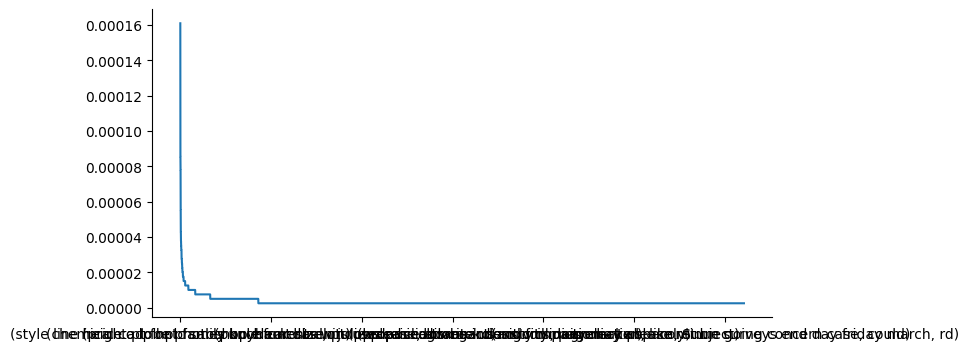

In [44]:
train_df[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

In [45]:
def ngram_model(start_words, n=10):
    result = start_words
    context = ' '.join(result[-n+1:])
    ngram_subset_probs = {pair : ngram_probs[pair] for pair in ngram_probs if pair[0] == context}
    return ngram_subset_probs

In [46]:
regularized_email_example = regularize_tokens(word_tokenize(train_X[0])) # TODO: tokenize and regularize
regularized_email_example

['Subject',
 'enron',
 'methanol',
 'meter',
 'follow',
 'note',
 'gave',
 'monday',
 'preliminary',
 'flow',
 'data',
 'provided',
 'daren',
 'please',
 'override',
 'pop',
 'daily',
 'volume',
 'presently',
 'zero',
 'reflect',
 'daily',
 'activity',
 'obtain',
 'gas',
 'control',
 'change',
 'needed',
 'asap',
 'economics',
 'purposes']

In [47]:
generated_text_probs = ngram_model(
    regularized_email_example
)

list(*generated_text_probs.keys())

['activity obtain gas control change needed asap economics purposes', 'ham']

In [48]:
from tqdm import tqdm
test_email_preds = []
for email_text in tqdm(test_X):
  email_words = regularize_tokens(word_tokenize(email_text))
  ngram_output = ngram_model(email_words)
  # TODO: if ngram output exists && if the highest probability shows spam for next token
  #       return spam
  #       else
  #       return ham
  if ngram_output:
    if list(ngram_output.keys())[0][1] == "spam":
      test_email_preds.append(1)
      continue

  test_email_preds.append(0)

100%|██████████| 1035/1035 [00:32<00:00, 32.24it/s]


In [49]:
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_y, test_email_preds))
print(confusion_matrix(test_y, test_email_preds))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       741
           1       1.00      0.07      0.14       294

    accuracy                           0.74      1035
   macro avg       0.87      0.54      0.49      1035
weighted avg       0.81      0.74      0.64      1035

[[741   0]
 [272  22]]
